In [ ]:
# -*- coding: utf-8 -*-
"""
Author: Mayank Kunwar
Find Me: https://in.linkedin.com/in/mayankkunwar93
"""

<ipython-input-2-d3db3eb88982>:18: RuntimeWarning: divide by zero encountered in divide
  r = np.where(sum_rgb > 0, R / sum_rgb, 0)  # Avoid division by zero
<ipython-input-2-d3db3eb88982>:18: RuntimeWarning: invalid value encountered in divide
  r = np.where(sum_rgb > 0, R / sum_rgb, 0)  # Avoid division by zero
<ipython-input-2-d3db3eb88982>:19: RuntimeWarning: divide by zero encountered in divide
  g = np.where(sum_rgb > 0, G / sum_rgb, 0)
<ipython-input-2-d3db3eb88982>:19: RuntimeWarning: invalid value encountered in divide
  g = np.where(sum_rgb > 0, G / sum_rgb, 0)
<ipython-input-2-d3db3eb88982>:20: RuntimeWarning: divide by zero encountered in divide
  b = np.where(sum_rgb > 0, B / sum_rgb, 0)
<ipython-input-2-d3db3eb88982>:20: RuntimeWarning: invalid value encountered in divide
  b = np.where(sum_rgb > 0, B / sum_rgb, 0)


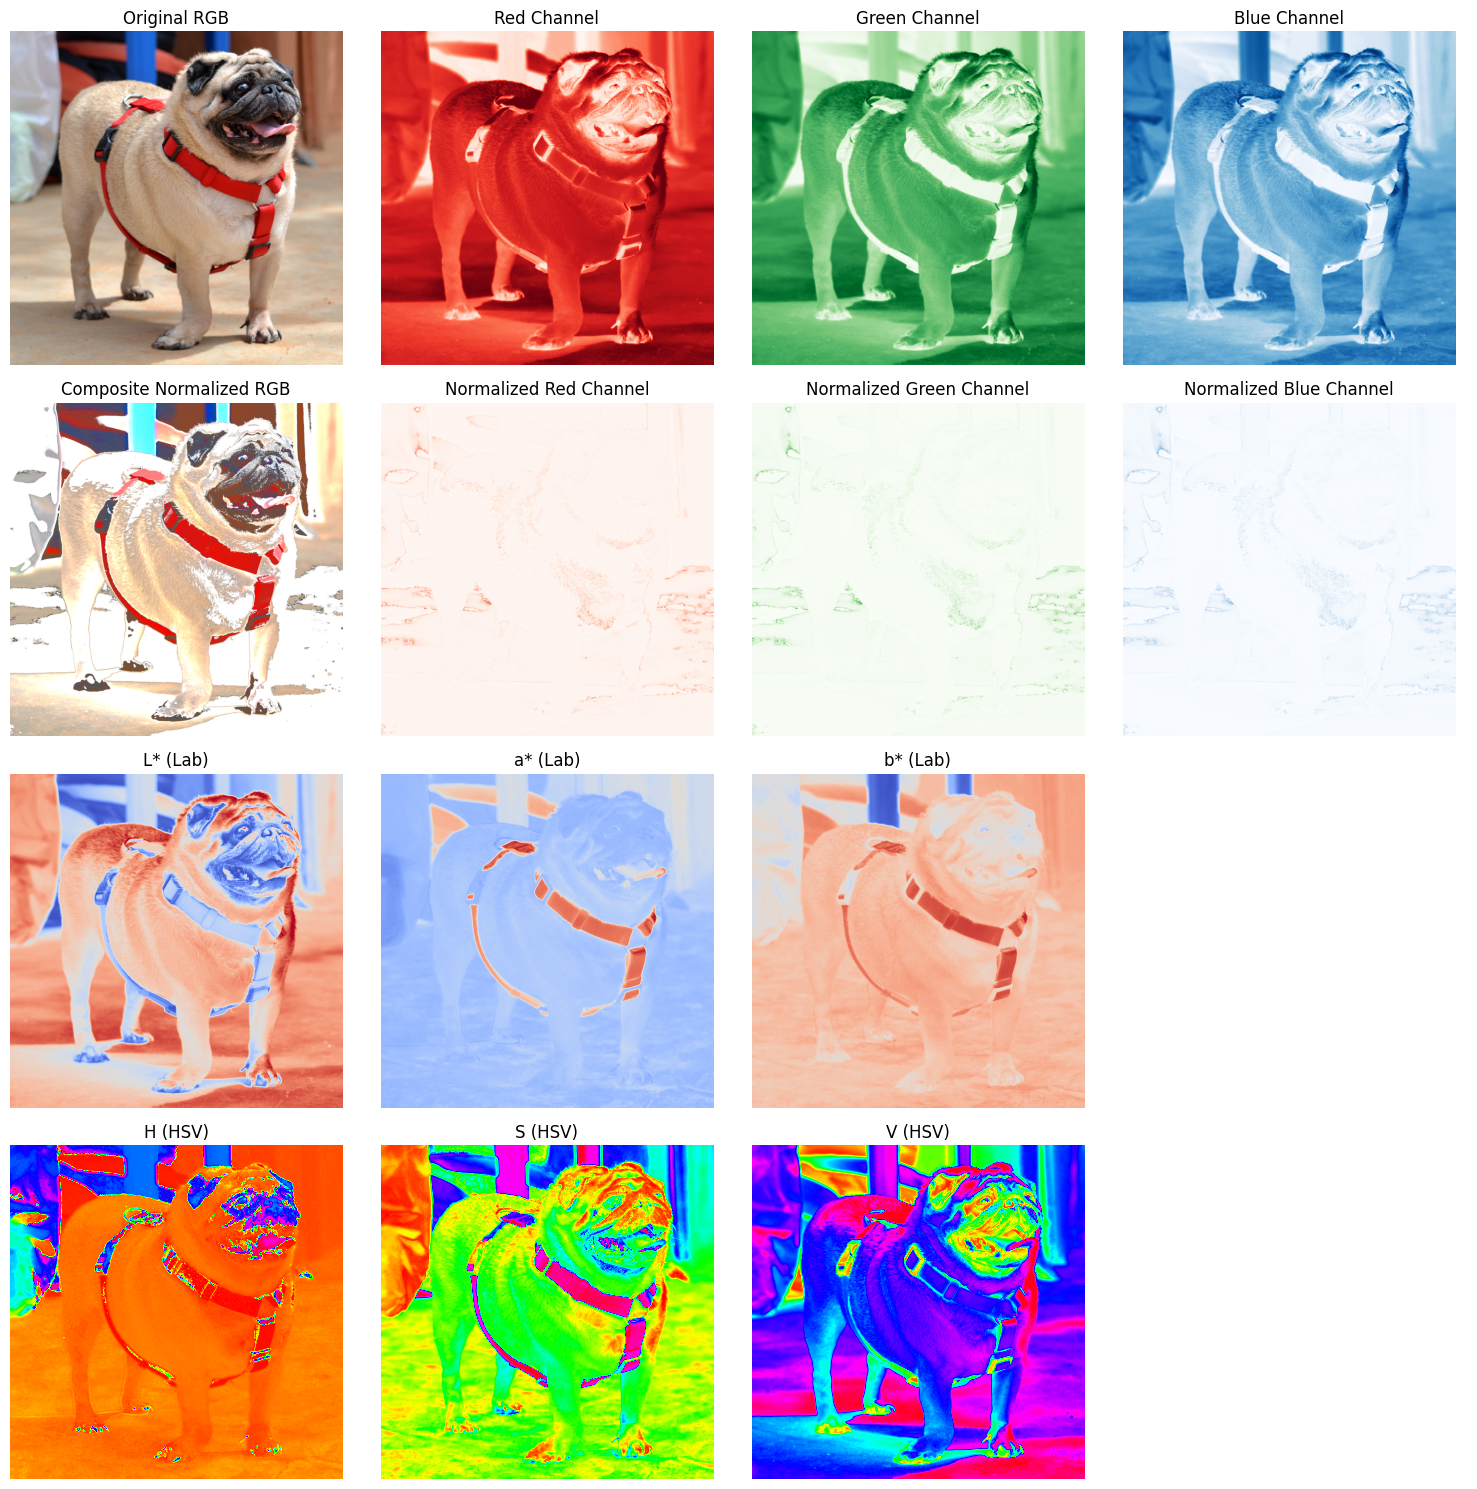

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

# Load the image
image_path = '/content/test_image_2.jpg'
image = io.imread(image_path)

# Ensure the image is in RGB
if image.ndim == 2:
    image = color.gray2rgb(image)

# Extract RGB channels
R, G, B = image[..., 0], image[..., 1], image[..., 2]

# Normalize the RGB channels
sum_rgb = R + G + B
r = np.where(sum_rgb > 0, R / sum_rgb, 0)  # Avoid division by zero
g = np.where(sum_rgb > 0, G / sum_rgb, 0)
b = np.where(sum_rgb > 0, B / sum_rgb, 0)

# Convert to other color spaces
rgb = image
hsv = color.rgb2hsv(image)
lab = color.rgb2lab(image)

# Extract L*, a*, b* from Lab color space
L_star, a_star, b_star = lab[..., 0], lab[..., 1], lab[..., 2]

# Extract H, S, V from HSV color space
H, S, V = hsv[..., 0], hsv[..., 1], hsv[..., 2]

# Create 3-channel images from normalized channels
r_image = np.stack([r, np.zeros_like(r), np.zeros_like(r)], axis=-1)  # Red channel image
g_image = np.stack([np.zeros_like(g), g, np.zeros_like(g)], axis=-1)  # Green channel image
b_image = np.stack([np.zeros_like(b), np.zeros_like(b), b], axis=-1)  # Blue channel image

# Plotting
fig, axs = plt.subplots(4, 4, figsize=(15, 15))

# Original RGB Image
axs[0, 0].imshow(image)
axs[0, 0].set_title('Original RGB')
axs[0, 0].axis('off')

# Red Channel
axs[0, 1].imshow(R, cmap='Reds')
axs[0, 1].set_title('Red Channel')
axs[0, 1].axis('off')

# Green Channel
axs[0, 2].imshow(G, cmap='Greens')
axs[0, 2].set_title('Green Channel')
axs[0, 2].axis('off')

# Blue Channel
axs[0, 3].imshow(B, cmap='Blues')
axs[0, 3].set_title('Blue Channel')
axs[0, 3].axis('off')

# Composite Image of Normalized Channels (RGB)
composite_image = np.stack([r, g, b], axis=-1)  # Stack normalized channels into a 3-channel image
axs[1, 0].imshow(composite_image)
axs[1, 0].set_title('Composite Normalized RGB')
axs[1, 0].axis('off')

# Normalized Red Channel
axs[1, 1].imshow(r, cmap='Reds')
axs[1, 1].set_title('Normalized Red Channel')
axs[1, 1].axis('off')

# Normalized Green Channel
axs[1, 2].imshow(g, cmap='Greens')
axs[1, 2].set_title('Normalized Green Channel')
axs[1, 2].axis('off')

# Normalized Blue Channel
axs[1, 3].imshow(b, cmap='Blues')
axs[1, 3].set_title('Normalized Blue Channel')
axs[1, 3].axis('off')

# L* Channel
axs[2, 0].imshow(L_star, cmap='coolwarm', vmin=0, vmax=100)
axs[2, 0].set_title('L* (Lab)')
axs[2, 0].axis('off')

# a* Channel
axs[2, 1].imshow(a_star, cmap='coolwarm')
axs[2, 1].set_title('a* (Lab)')
axs[2, 1].axis('off')

# b* Channel
axs[2, 2].imshow(b_star, cmap='coolwarm')
axs[2, 2].set_title('b* (Lab)')
axs[2, 2].axis('off')

# H Channel
axs[3, 0].imshow(H, cmap='hsv')
axs[3, 0].set_title('H (HSV)')
axs[3, 0].axis('off')

# S Channel
axs[3, 1].imshow(S, cmap='hsv')
axs[3, 1].set_title('S (HSV)')
axs[3, 1].axis('off')

# V Channel
axs[3, 2].imshow(V, cmap='hsv')
axs[3, 2].set_title('V (HSV)')
axs[3, 2].axis('off')

# Hide unused subplots
for ax in axs.flat[8:]:
    ax.axis('off')

plt.tight_layout()
plt.show()
